In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hotellings_tsqare import hotellings_tsqare,bootstrap_limit # hotellings_tsqare 파일 import

In [3]:
path = "C:/Users/User/github/Anomaly-Detection/data/"
df1 = pd.read_csv(path + "ph1.csv", encoding = 'CP949') # 정상 학습 데이터
df2 = pd.read_csv(path + "ph2.csv", encoding = 'CP949') # 정상 테스트
df3 = pd.read_csv(path + "ph2_out.csv", encoding = 'CP949') # 비정상 테스트

In [9]:
df4 = pd.concat([df2, df3], axis = 0)
tr = df1.iloc[:,7:49]
ts = df4.iloc[:,7:49]


## EDA

In [3]:
df1.head(3)

,TOOL_NAME,LOTID,GLSID,RECIPEID,MODEL_NAME,TIME_STAMP,PAS연동여부,MP_ALLSTEP.INNER_TEMP.Mean,MP_ALLSTEP.INNER_TEMP.Stdev,MP_ALLSTEP.OUTER_TEMP.Mean,...,MP_STEP4.RFGEN_FORWARD.Stdev,MP_STEP4.SIH4_FLOW.Mean,MP_STEP4.SIH4_FLOW.Stdev,MP_STEP4_No_Shift.RFGEN_REFLECT.Max,MP_STEP5_to_Last_PWR_Lift.RFGEN_REFLECT.Max,MP_STEP4.EI2.Max,MP_STEP4.EI3.Max,MP_STEP4.EI4.Max,Normal/Abnormal,추가정보_Data_Resume
0,Tool3,P8GA17009H00,P8GA17008J18,RUN_1ST_23,GA,2011-07-09 13:03,NG,339.4905,0.500300,359.1997,...,2.813200,6784.9612,3.471800,224.8672,910.9443,101.18,100.73,100.73,Normal,Normal
1,Tool3,P8CB1501R200,P8CB1501NM10,RUN_1ST_23,CB,2011-05-28 20:54,OK,338.3500,0.709432,359.1300,...,2.547539,6783.3300,2.728559,194.1000,149.6700,98.25,99.16,100.16,Normal,Normal
2,Tool1,P8CB16012J00,P8CB16010306,RUN_1ST_23,CB,2011-06-14 6:51,NG,339.5800,0.494180,359.4400,...,2.797812,6803.6200,2.303157,228.7700,894.1000,98.78,99.70,100.63,Normal,Normal


In [4]:
df1.tail(3)

,TOOL_NAME,LOTID,GLSID,RECIPEID,MODEL_NAME,TIME_STAMP,PAS연동여부,MP_ALLSTEP.INNER_TEMP.Mean,MP_ALLSTEP.INNER_TEMP.Stdev,MP_ALLSTEP.OUTER_TEMP.Mean,...,MP_STEP4.RFGEN_FORWARD.Stdev,MP_STEP4.SIH4_FLOW.Mean,MP_STEP4.SIH4_FLOW.Stdev,MP_STEP4_No_Shift.RFGEN_REFLECT.Max,MP_STEP5_to_Last_PWR_Lift.RFGEN_REFLECT.Max,MP_STEP4.EI2.Max,MP_STEP4.EI3.Max,MP_STEP4.EI4.Max,Normal/Abnormal,추가정보_Data_Resume
1997,Tool3,P8CB1501RA00,P8CB1501P517,RUN_1ST_23,CB,2011-05-28 20:22,OK,339.33,0.472365,359.31,...,2.897508,6783.05,1.436787,181.65,140.880000,99.17,98.73,98.36,Normal,Normal
1998,Tool3,P8CB15014X00,P8CB15013018,RUN_1ST_23,CB,2011-05-22 10:10,OK,337.62,0.486841,358.79,...,2.944260,6784.33,2.064728,187.02,165.537447,98.94,99.34,100.29,Normal,Normal
1999,Tool1,P8CB15016A00,P8CB15014405,RUN_1ST_23,CB,2011-05-22 19:57,OK,338.17,0.376128,358.40,...,2.593621,6804.64,1.601010,203.87,959.042910,100.00,99.66,99.31,Normal,Normal


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   TOOL_NAME                                    2000 non-null   object 
 1   LOTID                                        2000 non-null   object 
 2   GLSID                                        2000 non-null   object 
 3   RECIPEID                                     2000 non-null   object 
 4   MODEL_NAME                                   2000 non-null   object 
 5   TIME_STAMP                                   2000 non-null   object 
 6   PAS연동여부                                      2000 non-null   object 
 7   MP_ALLSTEP.INNER_TEMP.Mean                   2000 non-null   float64
 8   MP_ALLSTEP.INNER_TEMP.Stdev                  2000 non-null   float64
 9   MP_ALLSTEP.OUTER_TEMP.Mean                   2000 non-null   float64
 10  

In [6]:
df1['TOOL_NAME'].unique()

array(['Tool3', 'Tool1', 'Tool4', 'Tool2'], dtype=object)

In [7]:
df1['MODEL_NAME'].unique()

array(['GA', 'CB', 'FA', 'CE', 'FB', 'CA', 'BC', 'GD'], dtype=object)

In [8]:
df1['Normal/Abnormal'].unique()

array(['Normal'], dtype=object)

In [ ]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(df1.corr(), vmin = -1, vmax = 1, cmap='coolwarm')
plt.show()

In [10]:
df1.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_22060\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,MP_ALLSTEP.INNER_TEMP.Mean,MP_ALLSTEP.INNER_TEMP.Stdev,MP_ALLSTEP.OUTER_TEMP.Mean,MP_ALLSTEP.OUTER_TEMP.Stdev,MP_ALLSTEP.WALLHTR_TEMP1.Mean,MP_ALLSTEP.WALLHTR_TEMP1.Stdev,MP_STEP1_First10sec.PC_PRESSURE.Area,MP_STEP1_First10sec.PC_PRESSURE.Min,MP_STEP3.MATCHER_VDC.Mean,MP_STEP3.MATCHER_VDC.Stdev,...,MP_STEP4.PC_TV_ANGLE.Stdev,MP_STEP4.RFGEN_FORWARD.Mean,MP_STEP4.RFGEN_FORWARD.Stdev,MP_STEP4.SIH4_FLOW.Mean,MP_STEP4.SIH4_FLOW.Stdev,MP_STEP4_No_Shift.RFGEN_REFLECT.Max,MP_STEP5_to_Last_PWR_Lift.RFGEN_REFLECT.Max,MP_STEP4.EI2.Max,MP_STEP4.EI3.Max,MP_STEP4.EI4.Max
MP_ALLSTEP.INNER_TEMP.Mean,1.000000,-0.318614,0.842957,0.323037,0.195133,-0.105929,-0.158504,-0.209757,0.518889,0.057028,...,0.120632,-0.016539,-0.019965,-0.011357,0.028423,-0.034702,-0.030795,-0.001830,0.042636,0.047806
MP_ALLSTEP.INNER_TEMP.Stdev,-0.318614,1.000000,-0.239233,-0.132392,-0.134845,0.073221,0.127385,0.138080,-0.327217,-0.035097,...,-0.072694,0.049611,0.004002,0.025818,0.009519,0.059457,0.009257,-0.028464,-0.051502,-0.060343
MP_ALLSTEP.OUTER_TEMP.Mean,0.842957,-0.239233,1.000000,0.199624,0.317377,-0.205382,-0.097143,-0.147390,0.384478,0.047121,...,0.031222,-0.032735,-0.021319,-0.009335,0.049204,-0.083226,-0.033443,-0.140678,-0.002462,0.086643
MP_ALLSTEP.OUTER_TEMP.Stdev,0.323037,-0.132392,0.199624,1.000000,-0.006691,0.052037,-0.003154,0.016554,0.155795,0.073498,...,0.122819,0.103452,-0.011711,0.091150,-0.048159,0.020848,-0.023083,0.070564,0.017954,-0.039758
MP_ALLSTEP.WALLHTR_TEMP1.Mean,0.195133,-0.134845,0.317377,-0.006691,1.000000,-0.110659,-0.071679,-0.185897,0.275881,0.120439,...,-0.100466,-0.007326,-0.062075,-0.119964,-0.212266,-0.267693,0.061240,-0.173428,0.123248,0.265640
MP_ALLSTEP.WALLHTR_TEMP1.Stdev,-0.105929,0.073221,-0.205382,0.052037,-0.110659,1.000000,0.005454,0.011373,-0.008703,-0.006135,...,0.024748,0.028264,-0.004399,-0.012872,-0.045114,0.049197,0.015303,0.119658,0.029696,-0.042266
MP_STEP1_First10sec.PC_PRESSURE.Area,-0.158504,0.127385,-0.097143,-0.003154,-0.071679,0.005454,1.000000,0.609136,-0.427266,-0.110677,...,0.056628,0.760130,0.020017,0.747253,-0.225717,-0.063884,0.142590,-0.151383,-0.361962,-0.392661
MP_STEP1_First10sec.PC_PRESSURE.Min,-0.209757,0.138080,-0.147390,0.016554,-0.185897,0.011373,0.609136,1.000000,-0.355213,0.018070,...,-0.016836,0.715114,-0.121639,0.421762,0.025081,0.366341,0.173783,-0.277976,-0.439964,-0.410850
MP_STEP3.MATCHER_VDC.Mean,0.518889,-0.327217,0.384478,0.155795,0.275881,-0.008703,-0.427266,-0.355213,1.000000,0.184706,...,0.013515,-0.136807,-0.088933,-0.426407,0.028300,0.048628,0.062027,-0.042679,-0.007186,0.071122
MP_STEP3.MATCHER_VDC.Stdev,0.057028,-0.035097,0.047121,0.073498,0.120439,-0.006135,-0.110677,0.018070,0.184706,1.000000,...,-0.010632,0.003377,-0.103734,-0.197893,0.022962,0.145924,0.048791,-0.004607,-0.003313,0.011216


## 정상 Data

In [34]:
Tsqare_tr = hotellings_tsqare(tr,tr)
Tsqare_all = hotellings_tsqare(tr,ts)

In [35]:
bootstrap_limit(Tsqare_tr)

119.02051815154113

(0.0, 500.0)

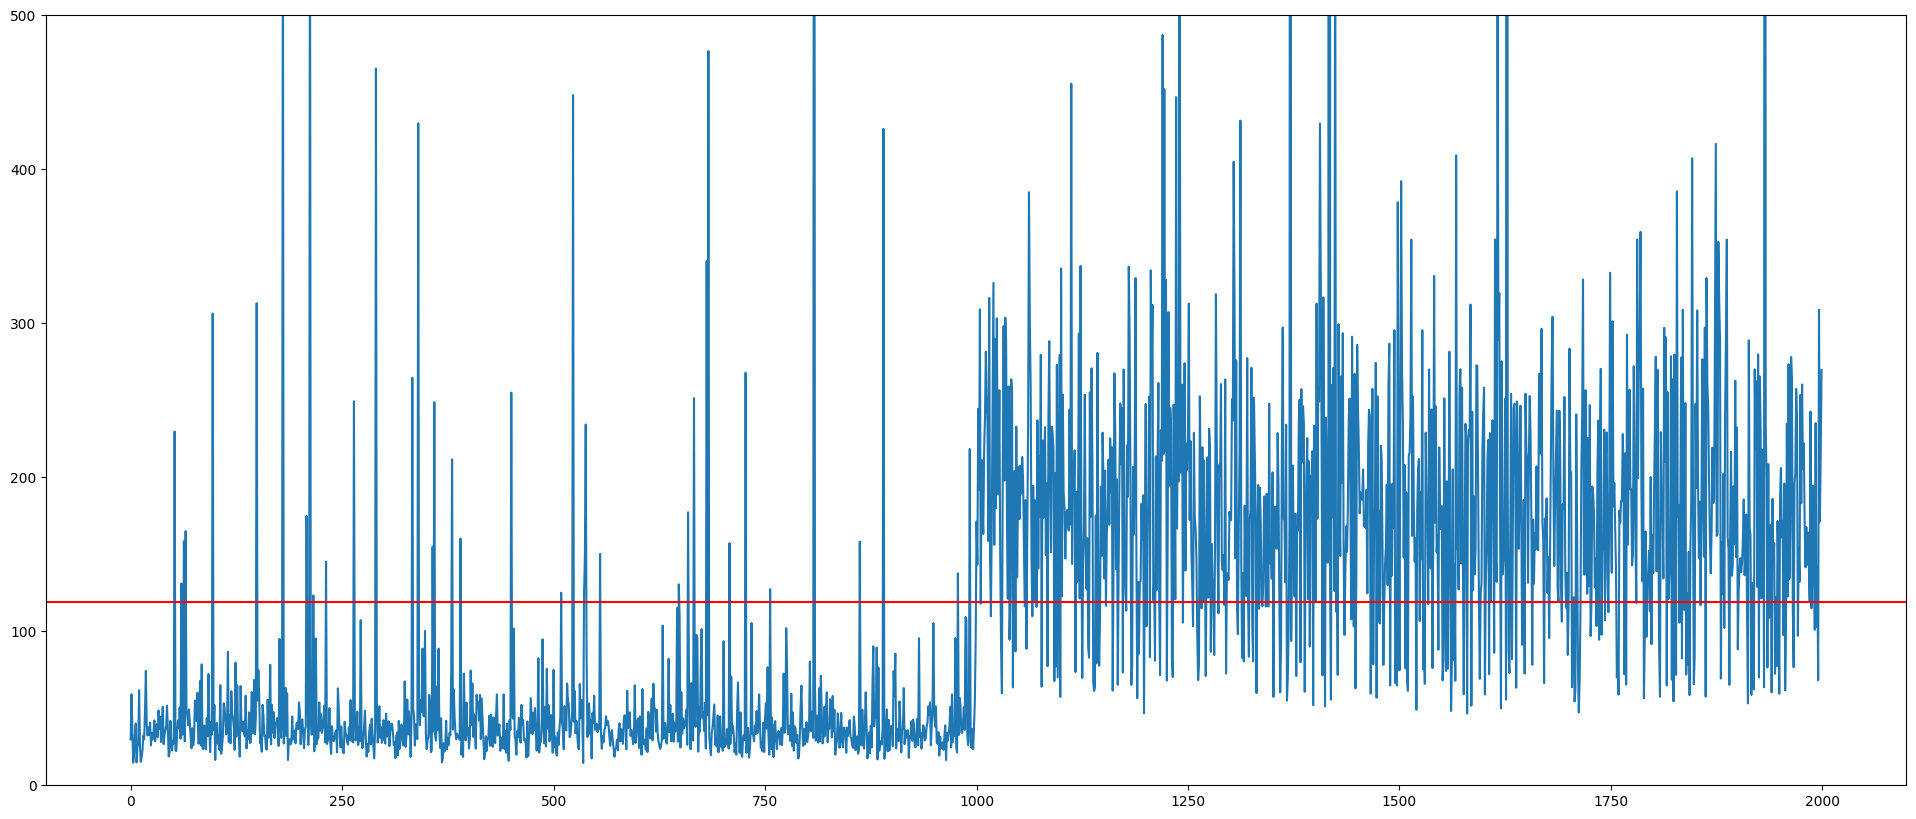

In [37]:
x = np.arange(0,len(Tsqare),1)
fig = plt.figure(figsize=(24,10))
plt.plot(x,Tsqare_all)
plt.axhline(y=bootstrap_limit(Tsqare), color = 'red')
plt.ylim(0,500)